# Alunos
Fernando Bianchi - 00335450

Mateus Pletsch - 00338372

# Setup

In [1]:
!git clone https://github.com/Febianchi/fernando-matheus

Cloning into 'fernando-matheus'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 4), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 9.84 MiB | 28.94 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
%cd fernando-matheus/

/content/fernando-matheus


In [3]:
!pip install pylhe
#!pip install git+https://github.com/scikit-hep/pylhe.git --quiet
!pip install matplotlib numpy --quiet
!pip install pylhe awkward vector
!gzip -d -k -f {'data/sinal.lhe.gz'} # unpack files
!gzip -d -k -f {'data/fundo.lhe.gz'}

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.9/655.9 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.0/308.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 14.7 MB/s eta 0:00:00


In [4]:
import pylhe
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
from pathlib import Path
from pprint import pprint
import gzip

# Tabela do PDG

| ID | Partícula | Símbolo | Tipo |
| :---: | :--- | :---: | :--- |
| **1** | Down Quark | $d$ | Quark |
| **2** | Up Quark | $u$ | Quark |
| **3** | Strange Quark | $s$ | Quark |
| **4** | Charm Quark | $c$ | Quark |
| **5** | Bottom Quark | $b$ | Quark |
| **6** | Top Quark | $t$ | Quark |
| | | | |
| **11** | Elétron | $e^-$ | Lépton |
| **12** | Neutrino do Elétron | $\nu_e$ | Lépton |
| **13** | Múon | $\mu^⁻$ | Lépton |
| **14** | Neutrino do Múon | $\nu_\mu$ | Lépton |
| **15** | Tau | $\tau^-$ | Lépton |
| **16** | Neutrino do Tau | $\nu_\tau$ | Lépton |
| | | | |
| **21** | Glúon | $g$ | Bóson |
| **22** | Fóton | $\gamma$ | Bóson |
| **23** | Z Boson | $Z^0$ | Bóson |
| **24** | W Boson | $W^+$ | Bóson |
| **25** | Higgs Boson | $H$ | Bóson |

---
**Regra dos Sinais:**
* **Positivo (+):** Partícula (ex: `6` é o Top).
* **Negativo (-):** Antipartícula (ex: `-6` é o Anti-Top, `-24` é o $W^-$).
* **Exceção:** Glúons e Bosons Z/H/Fóton são suas próprias antipartículas (ou não têm distinção de carga no ID básico), então geralmente aparecem positivos.

# [1] Leitura do Arquivo LHE utilizando pylhe

In [5]:
# reading .lhe file to understand the format

with gzip.open('data/sinal.lhe.gz', 'rt') as f:
    content = f.read()
print(content[:30000])

<LesHouchesEvents version="3.0">
<header>
<!--
#*********************************************************************
#                                                                    *
#                        MadGraph5_aMC@NLO                           *
#                                                                    *
#                           Going Beyond                             *
#                                                                    *
#                   http://madgraph.hep.uiuc.edu                     *
#                   http://madgraph.phys.ucl.ac.be                   *
#                   http://amcatnlo.cern.ch                          *
#                                                                    *
#                     The MadGraph5_aMC@NLO team                     *
#                                                                    *
#....................................................................*
#                             

In [6]:
fundo_path = "data/fundo.lhe"
sinal_path = "data/sinal.lhe"
fundo_file = pylhe.read_lhe(fundo_path)
sinal_file = pylhe.read_lhe(sinal_path)

# [2a] Investigação Preliminar do Arquivo


In [7]:
# Carregar em lista (permisso para arquivos moderados)
print("Convertendo generator em lista")
fundo_events = list(pylhe.read_lhe(fundo_path))
sinal_events = list(pylhe.read_lhe(sinal_path))

print(f"Número total de eventos no fundo:  {len(fundo_events)}")
print(f"Número total de eventos no sinal:  {len(fundo_events)}")

Convertendo generator em lista


/tmp/ipython-input-10486056.py:3: DeprecationWarning: read_lhe is deprecated and will be removed in a future version. Use `LHEFile.fromfile(...).events` instead
  fundo_events = list(pylhe.read_lhe(fundo_path))
/tmp/ipython-input-10486056.py:4: DeprecationWarning: read_lhe is deprecated and will be removed in a future version. Use `LHEFile.fromfile(...).events` instead
  sinal_events = list(pylhe.read_lhe(sinal_path))


Número total de eventos no fundo:  10000
Número total de eventos no sinal:  10000


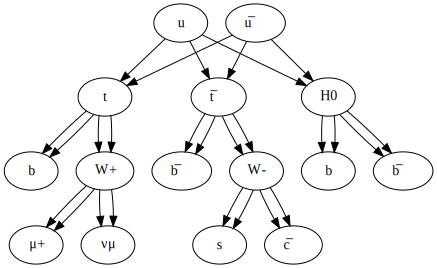

In [8]:
sinal_events[0] # curioso...

In [9]:
sinal_events[0].particles # printando particulas do primeiro evento

[LHEParticle(id=2, status=-1, mother1=0, mother2=0, color1=502, color2=0, px=0.0, py=0.0, pz=1358.3263507, e=1358.3263507, m=0.0, lifetime=0.0, spin=-1.0),
 LHEParticle(id=-2, status=-1, mother1=0, mother2=0, color1=0, color2=501, px=-0.0, py=-0.0, pz=-226.24941982, e=226.24941982, m=0.0, lifetime=0.0, spin=1.0),
 LHEParticle(id=6, status=2, mother1=1, mother2=2, color1=502, color2=0, px=224.12990053, py=-47.2396414, pz=483.21823437, e=562.04506764, m=173.0, lifetime=0.0, spin=0.0),
 LHEParticle(id=-6, status=2, mother1=1, mother2=2, color1=0, color2=501, px=-410.58184718, py=83.212214424, pz=155.26886083, e=479.10243686, m=173.0, lifetime=0.0, spin=0.0),
 LHEParticle(id=25, status=2, mother1=1, mother2=2, color1=0, color2=0, px=186.45194665, py=-35.972573024, pz=493.58983563, e=543.42826597, m=125.0, lifetime=0.0, spin=0.0),
 LHEParticle(id=5, status=1, mother1=3, mother2=3, color1=502, color2=0, px=196.20100827, py=-25.888762582, pz=320.03724877, e=376.31236264, m=4.7, lifetime=0.0, 

In [10]:
for event in itertools.islice(fundo_events, 0, 5):
    print(f"Event weight: {event.weights}")
    for particle in event.particles:
        print(f"  Particle PDG ID: {particle.id}, Px: {particle.px}, Py: {particle.py}, Pz: {particle.pz}, Energy: {particle.e}")

Event weight: {}
  Particle PDG ID: 21, Px: 0.0, Py: 0.0, Pz: 166.45154857, Energy: 166.45154857
  Particle PDG ID: 21, Px: -0.0, Py: -0.0, Pz: -905.61588125, Energy: 905.61588125
  Particle PDG ID: 6, Px: 31.66087569, Py: -108.68252378, Pz: -277.92695927, Energy: 346.39095934
  Particle PDG ID: -6, Px: 19.423711301, Py: -178.20718461, Pz: -259.41661356, Energy: 359.66798662
  Particle PDG ID: 23, Px: -51.084586991, Py: 286.88970839, Pz: -201.82075984, Energy: 366.00848385
  Particle PDG ID: -5, Px: 72.537520508, Py: -63.159792205, Pz: -77.039652214, Energy: 123.32091974
  Particle PDG ID: -24, Px: -53.113809207, Py: -115.0473924, Pz: -182.37696134, Energy: 236.34706687
  Particle PDG ID: 3, Px: 8.9262320006, Py: -76.479044454, Pz: -86.386854253, Energy: 115.72126186
  Particle PDG ID: -4, Px: -62.040041207, Py: -38.568347948, Pz: -95.990107088, Energy: 120.62580501
  Particle PDG ID: 5, Px: 53.168459605, Py: -110.82151854, Pz: -165.28287863, Energy: 206.03109969
  Particle PDG ID: 24,

# [2b] Investigação Preliminar dos Eventos

In [11]:
pdg_map = {
    1: 'd', 2: 'u', 3: 's', 4: 'c', 5: 'b', 6: 'Top',
    -1: 'd~', -2: 'u~', -3: 's~', -4: 'c~', -5: 'b~', -6: 'Top~',
    11: 'e-', -11: 'e+', 12: 'nu_e', -12: 'nu_e~',
    13: 'mu-', -13: 'mu+', 14: 'nu_mu', -14: 'nu_mu~',
    15: 'tau-', -15: 'tau+', 16: 'nu_tau', -16: 'nu_tau~',
    21: 'Gluon', 22: 'Photon', 23: 'Z', 24: 'W+', -24: 'W-', 25: 'Higgs'
}

def analisar_lhe(file_path, label):
    """
    Lê um arquivo .lhe e imprime a tabela de estatísticas de partículas.
    Requer que o dicionário 'pdg_map' e a biblioteca 'pylhe' já estejam definidos.
    """

    # Dicionário para guardar as estatísticas
    # Chave: Nome da Partícula -> Valor: {status -1: qtd, status 1: qtd, status 2: qtd}
    stats = {}

    # --- LEITURA COM PYLHE ---
    for event in pylhe.read_lhe(file_path):
        for p in event.particles:
            # Pega o nome (ou usa o ID se não tiver no mapa)
            nome = pdg_map.get(p.id, str(p.id))
            status = p.status

            # Inicializa a entrada no dicionário se a partícula é nova
            if nome not in stats:
                stats[nome] = {-1: 0, 1: 0, 2: 0, 'outros': 0}

            # Incrementa o contador baseada no status
            if status in [-1, 1, 2]:
                stats[nome][status] += 1
            else:
                stats[nome]['outros'] += 1

    # --- PRINTANDO TABELA  ---
    print("\n" + "="*65)
    print(f"Tabela com contagem total partículas presentes após contagem nos eventos conforme status para o {label}")
    print(f"{'PARTÍCULA':<15} | {'INICIAL (-1)':^12} | {'FINAL (1)':^12} | {'INTERM. (2)':^12}")
    print("="*65)

    # Ordena em ordem alfabetica
    for nome in sorted(stats.keys()):
        dados = stats[nome]

        total = sum(dados.values())
        if total > 0:
            col_in = dados[-1]
            col_fin = dados[1]
            col_int = dados[2]

            # O :<15 alinha à esquerda com 15 espaços
            # O :^12 centraliza em 12 espaços
            print(f"{nome:<15} | {col_in:^12} | {col_fin:^12} | {col_int:^12}")

    print("="*65)

In [12]:
analisar_lhe("data/sinal.lhe", "SINAL")

/tmp/ipython-input-4003919115.py:21: DeprecationWarning: read_lhe is deprecated and will be removed in a future version. Use `LHEFile.fromfile(...).events` instead
  for event in pylhe.read_lhe(file_path):



Tabela com contagem total partículas presentes após contagem nos eventos conforme status para o SINAL
PARTÍCULA       | INICIAL (-1) |  FINAL (1)   | INTERM. (2) 
Gluon           |    14790     |      0       |      0      
Higgs           |      0       |      0       |    10000    
Top             |      0       |      0       |    10000    
Top~            |      0       |      0       |    10000    
W+              |      0       |      0       |    10000    
W-              |      0       |      0       |    10000    
b               |      0       |    20000     |      0      
b~              |      0       |    20000     |      0      
c               |      53      |      0       |      0      
c~              |      53      |     5099     |      0      
d               |     945      |     4901     |      0      
d~              |     945      |      0       |      0      
e+              |      0       |     4935     |      0      
mu+             |      0       |     5065  

In [13]:
# Para o Fundo
analisar_lhe("data/fundo.lhe", "FUNDO")

/tmp/ipython-input-4003919115.py:21: DeprecationWarning: read_lhe is deprecated and will be removed in a future version. Use `LHEFile.fromfile(...).events` instead
  for event in pylhe.read_lhe(file_path):



Tabela com contagem total partículas presentes após contagem nos eventos conforme status para o FUNDO
PARTÍCULA       | INICIAL (-1) |  FINAL (1)   | INTERM. (2) 
Gluon           |    14092     |      0       |      0      
Top             |      0       |      0       |    10000    
Top~            |      0       |      0       |    10000    
W+              |      0       |      0       |    10000    
W-              |      0       |      0       |    10000    
Z               |      0       |      0       |    10000    
b               |      0       |    20000     |      0      
b~              |      0       |    20000     |      0      
c               |      40      |      0       |      0      
c~              |      40      |     4902     |      0      
d               |     1629     |     5098     |      0      
d~              |     1629     |      0       |      0      
e+              |      0       |     5046     |      0      
mu+             |      0       |     4954  

## Qual é o processo de sinal?
Sabemos que os arquivos .lhe contêm 10.000 eventos cada. Observamos que o bóson de Higgs aparece 10.000 vezes como estado intermediário, acompanhado pela produção de um par top–antitop. Portanto, esse arquivo corresponde à produção de eventos envolvendo um Higgs intermediário.

Um dos canais de decaimento do Higgs é em bósons W⁺ e W⁻. Isso explica por que também encontramos cerca de 10.000 ocorrências de W⁺ e W⁻, assim como 20.000 quarks b e b̄: eles são produtos diretos dos decaimentos dos Higgs gerados.

A razão das contagens de evntos em outros léptons é porque os bósons W⁺ e W⁻ decaem em léptons (e⁺, μ⁺), neutrinos, e também em quarks leves (d, s, c, u), dependendo do canal de decaimento.

Em resumo, temos a reação:
pp → t ̄t H → bW+ ̄bW- b ̄b

## Qual é o processo do fundo?
Sabemos que os arquivos .lhe contêm 10.000 eventos cada. Observamos que o bóson Z aparece 10.000 vezes como estado intermediário, acompanhado pela produção de um par top–antitop. Portanto, esse arquivo corresponde à produção de eventos envolvendo um bóson Z intermediário.

Os tops decaem naturalmente em bósons W e quarks b. Além disso, o canal de decaimento do bóson Z simulado aqui é em par quark–antiquark (bbˉ). Isso explica por que também encontramos cerca de 10.000 ocorrências de W⁺ e W⁻, assim como 20.000 pares de quarks b e b̄ (40.000 no total): eles são produtos combinados dos decaimentos dos tops e do bóson Z gerado.

A razão das contagens de eventos em outros léptons é porque os bósons W⁺ e W⁻ decaem em léptons (e⁺, μ⁺), neutrinos, e também em quarks leves (d, s, c, u), dependendo do canal de decaimento.

Em resumo, temos a reação:
pp→ t ̄t Z→ bW+ ̄bW− b ̄b

# [3] Exploração do Conteúdo - Construção de Histogramas

<>:66: SyntaxWarning: invalid escape sequence '\e'
<>:67: SyntaxWarning: invalid escape sequence '\e'
<>:74: SyntaxWarning: invalid escape sequence '\p'
<>:75: SyntaxWarning: invalid escape sequence '\p'
<>:66: SyntaxWarning: invalid escape sequence '\e'
<>:67: SyntaxWarning: invalid escape sequence '\e'
<>:74: SyntaxWarning: invalid escape sequence '\p'
<>:75: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2437575186.py:66: SyntaxWarning: invalid escape sequence '\e'
  ax[1].set_title("Pseudorapidez ($\eta$)")
/tmp/ipython-input-2437575186.py:67: SyntaxWarning: invalid escape sequence '\e'
  ax[1].set_xlabel("$\eta$")
/tmp/ipython-input-2437575186.py:74: SyntaxWarning: invalid escape sequence '\p'
  ax[2].set_title("Ângulo Azimutal ($\phi$)")
/tmp/ipython-input-2437575186.py:75: SyntaxWarning: invalid escape sequence '\p'
  ax[2].set_xlabel("$\phi$ [rad]")
/tmp/ipython-input-2437575186.py:25: DeprecationWarning: read_lhe is deprecated and will be removed in a future ve

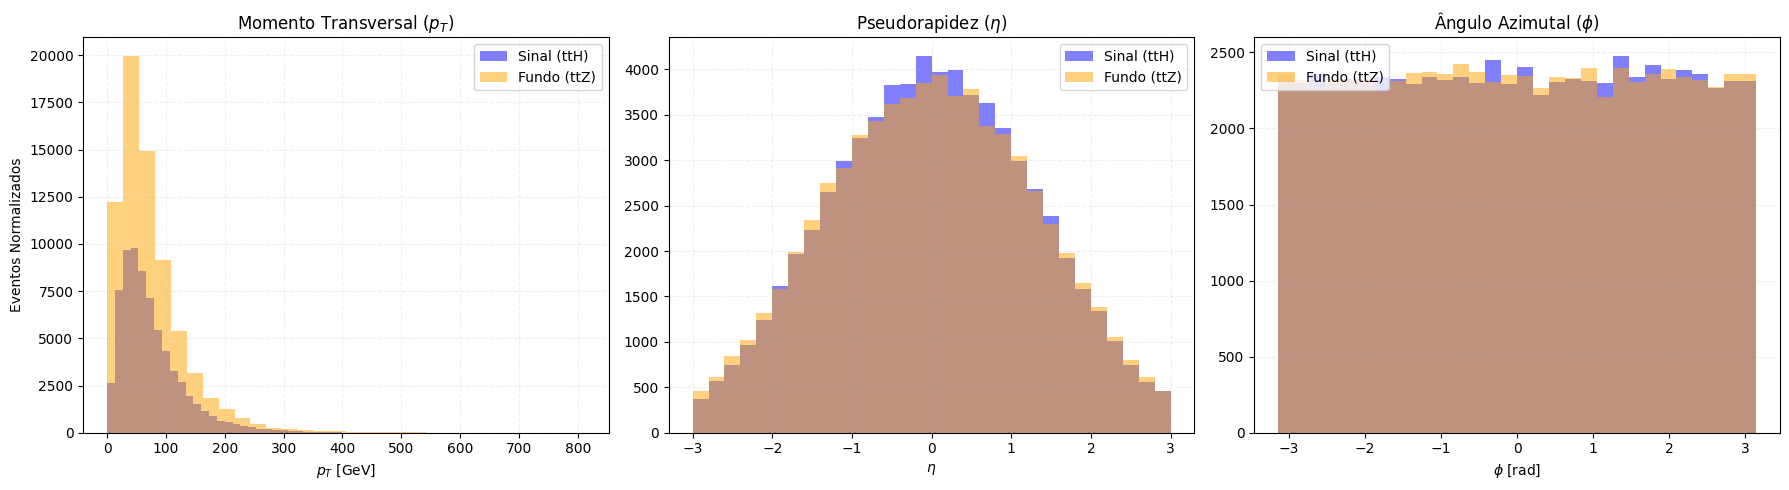

In [14]:
import pylhe
import matplotlib.pyplot as plt
import numpy as np

def calcular_cinematica(px, py, pz):
    # (pT)
    pt = np.sqrt(px**2 + py**2)
    p = np.sqrt(px**2 + py**2 + pz**2)

    # Pseudorapidez (Eta)
    if p - pz == 0 or p + pz == 0:
        eta = 0 # ou np.inf, mas 0 é seguro para plot
    else:
        eta = 0.5 * np.log((p + pz) / (p - pz))

    # (Phi)
    phi = np.arctan2(py, px)

    return pt, eta, phi

def extrair_dados_histograma(caminho_arquivo, ignora_neutrinos=True):
    """Lê o arquivo e retorna listas de pT, eta e phi para partículas finais (exceto neutrinos)"""
    pts, etas, phis = [], [], []

    for event in pylhe.read_lhe(caminho_arquivo):
      for p in event.particles:
        # Filtro 1: Status = 1 (Partícula Final Estável)
        if p.status == 1:
          # Filtro 2: Excluir Neutrinos (IDs 12, 14, 16 e seus negativos)
          if ignora_neutrinos:
            if abs(p.id) not in [12, 14, 16]:

              pt, eta, phi = calcular_cinematica(p.px, p.py, p.pz)
              pts.append(pt)
              etas.append(eta)
              phis.append(phi)
          else:
            pt, eta, phi = calcular_cinematica(p.px, p.py, p.pz)
            pts.append(pt)
            etas.append(eta)
            phis.append(phi)

    return pts, etas, phis

# --- 1. Extração dos Dados ---
s_pt, s_eta, s_phi = extrair_dados_histograma("data/sinal.lhe")
f_pt, f_eta, f_phi = extrair_dados_histograma("data/fundo.lhe")

# --- 2. Plotagem dos Histogramas ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
kwargs = dict(alpha=0.5, bins=30, ec="k")
# Nota: density=True normaliza a área para 1, facilitando comparar formas se o nº de eventos fosse diferente

# --- Plot 1: Momento Transversal (pT) ---
ax[0].hist(s_pt, range=(0, 400), color='blue', label='Sinal (ttH)', **kwargs)
ax[0].hist(f_pt, color='orange', label='Fundo (ttZ)', **kwargs)
ax[0].set_title("Momento Transversal ($p_T$)")
ax[0].set_xlabel("$p_T$ [GeV]")
ax[0].set_ylabel("Eventos Normalizados")
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.2)

# --- Plot 2: Pseudorapidez (Eta) ---
ax[1].hist(s_eta, range=(-3, 3), color='blue', label='Sinal (ttH)', **kwargs)
ax[1].hist(f_eta, range=(-3, 3), color='orange', label='Fundo (ttZ)', **kwargs)
ax[1].set_title("Pseudorapidez ($\eta$)")
ax[1].set_xlabel("$\eta$")
ax[1].legend()
ax[1].grid(True, linestyle='--', alpha=0.2)

# --- Plot 3: Ângulo Azimutal (Phi) ---
ax[2].hist(s_phi, range=(-np.pi, np.pi), color='blue', label='Sinal (ttH)', **kwargs)
ax[2].hist(f_phi, range=(-np.pi, np.pi), color='orange', label='Fundo (ttZ)', **kwargs)
ax[2].set_title("Ângulo Azimutal ($\phi$)")
ax[2].set_xlabel("$\phi$ [rad]")
ax[2].legend()
ax[2].grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

In [15]:
# --- Estatísticas dos Histogramas ---
print("="*50)
print("ESTATÍSTICAS DOS HISTOGRAMAS (ENTRADAS)")
print("="*50)

# O tamanho da lista de pT (len) é igual ao número total de partículas plotadas
print("pT")
print(f"SINAL: {len(s_pt)} eventos (ou seja {len(s_pt)} partículas)")
print(f"FUNDO: {len(f_pt)} eventos (ou seja {len(f_pt)} partículas)")
print("-"*50)
print("eta")
print(f"SINAL: {len(s_eta)} eventos (ou seja {len(s_eta)} partículas)")
print(f"FUNDO: {len(f_eta)} eventos (ou seja {len(f_eta)} partículas)")
print("-"*50)
print("phi")
print(f"SINAL: {len(s_phi)} eventos (ou seja {len(s_phi)} partículas)")
print(f"FUNDO: {len(f_phi)} eventos (ou seja {len(f_phi)} partículas)")

ESTATÍSTICAS DOS HISTOGRAMAS (ENTRADAS)
pT
SINAL: 70000 eventos (ou seja 70000 partículas)
FUNDO: 70000 eventos (ou seja 70000 partículas)
--------------------------------------------------
eta
SINAL: 70000 eventos (ou seja 70000 partículas)
FUNDO: 70000 eventos (ou seja 70000 partículas)
--------------------------------------------------
phi
SINAL: 70000 eventos (ou seja 70000 partículas)
FUNDO: 70000 eventos (ou seja 70000 partículas)


### Pergunta:
Os histogramas representam todos os eventos do arquivo LHE?  
Se não, explique o porquê (por exemplo: presença ou ausência de certas partículas nos eventos).

Não, os histogramas não representam todos os eventos do arquivo LHE. Primeiramente, só foram utilizados os eventos correspondentes aos estados finais, ou seja, os léptons que surgiram de decaimentos intermediários (status==1). Além disso, como solicitado nas instruções, foram ignorados os neutrinos (embora os neutrinos não sejam detectados de qualquer maneira) durante a construção dos histogramas.

# [4] Filtros e Cortes Cinemáticos

In [16]:
def extrair_dados_com_cortes(caminho_arquivo, pt_min, eta_max):
    pts, etas, phis = [], [], []
    total_particulas = 0
    aceitas = 0

    print(f"Processando {caminho_arquivo} com cortes (pT > {pt_min}, |eta| < {eta_max})...")

    for event in pylhe.read_lhe(caminho_arquivo):
        for p in event.particles:
            # Filtro base: Status 1 e não neutrino
            if p.status == 1 and abs(p.id) not in [12, 14, 16]:
                total_particulas += 1

                pt, eta, phi = calcular_cinematica(p.px, p.py, p.pz)

                # --- APLICAÇÃO DOS CORTES ---
                # Só guardamos se passar nas duas condições
                if (pt > pt_min) and (abs(eta) < eta_max):
                    pts.append(pt)
                    etas.append(eta)
                    phis.append(phi)
                    aceitas += 1

    return pts, etas, phis, total_particulas, aceitas

Processando data/sinal.lhe com cortes (pT > 40.0, |eta| < 2.1)...


<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-4101573840.py:22: SyntaxWarning: invalid escape sequence '\e'
  ax[1].axvline(ETA_MAX, color='k', linestyle='--', label=f'|$\eta$| < {ETA_MAX}') # Linha do corte
/tmp/ipython-input-4101573840.py:24: SyntaxWarning: invalid escape sequence '\e'
  ax[1].set_title(f"Pseudorapidez ($|\eta| < {ETA_MAX}$)")
/tmp/ipython-input-4101573840.py:25: SyntaxWarning: invalid escape sequence '\e'
  ax[1].set_xlabel("$\eta$")
/tmp/ipython-input-4101573840.py:31: SyntaxWarning: invalid

Processando data/fundo.lhe com cortes (pT > 40.0, |eta| < 2.1)...


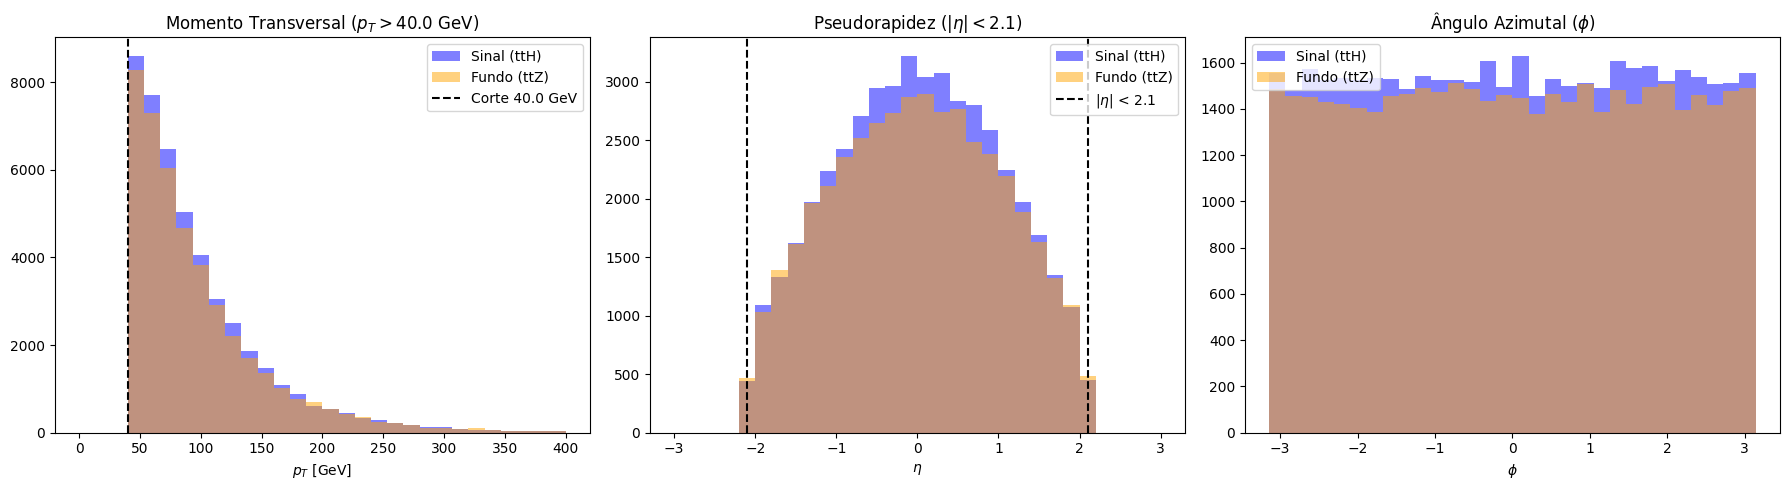


Corte realizado pT > 40.0
Corte realizado em eta < 2.1
ANÁLISE DE EFICIÊNCIA DOS CORTES
SINAL (ttH):
  - Partículas Totais: 70000
  - Partículas Aceitas: 46049
  - Perda: 34.22% das partículas foram cortadas.
------------------------------
FUNDO (ttZ):
  - Partículas Totais: 70000
  - Partículas Aceitas: 43564
  - Perda: 37.77% das partículas foram cortadas.


In [17]:
PT_MIN = 40.0
ETA_MAX = 2.1

s_pt, s_eta, s_phi, s_tot, s_ok = extrair_dados_com_cortes("data/sinal.lhe", PT_MIN, ETA_MAX)
f_pt, f_eta, f_phi, f_tot, f_ok = extrair_dados_com_cortes("data/fundo.lhe", PT_MIN, ETA_MAX)

# --- Plotagem ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
kwargs = dict(alpha=0.5, bins=30, ec="k")

# Plot pT
ax[0].hist(s_pt, range=(0, 400), color='blue', label='Sinal (ttH)', **kwargs)
ax[0].hist(f_pt, range=(0, 400), color='orange', label='Fundo (ttZ)', **kwargs)
ax[0].axvline(PT_MIN, color='k', linestyle='--', label=f'Corte {PT_MIN} GeV') # Linha do corte
ax[0].set_title(f"Momento Transversal ($p_T > {PT_MIN}$ GeV)")
ax[0].set_xlabel("$p_T$ [GeV]")
ax[0].legend()

# Plot Eta
ax[1].hist(s_eta, range=(-3, 3), color='blue', label='Sinal (ttH)', **kwargs)
ax[1].hist(f_eta, range=(-3, 3), color='orange', label='Fundo (ttZ)', **kwargs)
ax[1].axvline(ETA_MAX, color='k', linestyle='--', label=f'|$\eta$| < {ETA_MAX}') # Linha do corte
ax[1].axvline(-ETA_MAX, color='k', linestyle='--')
ax[1].set_title(f"Pseudorapidez ($|\eta| < {ETA_MAX}$)")
ax[1].set_xlabel("$\eta$")
ax[1].legend()

# Plot Phi
ax[2].hist(s_phi, range=(-np.pi, np.pi), color='blue', label='Sinal (ttH)', **kwargs)
ax[2].hist(f_phi, range=(-np.pi, np.pi), color='orange', label='Fundo (ttZ)', **kwargs)
ax[2].set_title("Ângulo Azimutal ($\phi$)")
ax[2].set_xlabel("$\phi$")
ax[2].legend()

plt.tight_layout()
plt.show()

# --- 3. Relatório de Eficiência dos Cortes ---
print("\n" + "="*60)
print(f"Corte realizado pT > {PT_MIN}")
print(f"Corte realizado em eta < {ETA_MAX}")
print("ANÁLISE DE EFICIÊNCIA DOS CORTES")
print("="*60)
print(f"SINAL (ttH):")
print(f"  - Partículas Totais: {s_tot}")
print(f"  - Partículas Aceitas: {s_ok}")
print(f"  - Perda: {100*(s_tot-s_ok)/s_tot:.2f}% das partículas foram cortadas.")
print("-" * 30)
print(f"FUNDO (ttZ):")
print(f"  - Partículas Totais: {f_tot}")
print(f"  - Partículas Aceitas: {f_ok}")
print(f"  - Perda: {100*(f_tot-f_ok)/f_tot:.2f}% das partículas foram cortadas.")
print("="*60)

# Podemos observar nos plots após os cortes com pT > 40.0 e |eta| < 2.1 que foi revelado um pouco do sinal (em azul) em relação ao fundo. Isso é mais notável no plot em phi, que é um fundo contínuo.